In [1]:
from torch import nn,optim,cuda,save
from torch.utils import data
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2

In [2]:
device = torch.device('cuda')
print(device)

cuda


In [4]:
train_dataset = datasets.MNIST(root='/mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset =  datasets.MNIST(root='/mnist_data/',
                               train=False,
                               transform=transforms.ToTensor())
train_data = data.DataLoader(train_dataset,batch_size=64,shuffle=True)
test_data = data.DataLoader(test_dataset,batch_size=64,shuffle=True)

class Madel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.l1 = nn.Linear(784,550)
    self.l2 = nn.Linear(550,320)
    self.l3 = nn.Linear(320,120)
    self.l4 = nn.Linear(120,10)
    self.relu = nn.ReLU()

  def forward(self,x):
    x = x.view(-1,784)
    x1 = self.relu(self.l1(x))
    x2 = self.relu(self.l2(x1))
    x3 = self.relu(self.l3(x2))
    return self.l4(x3)

model = Madel()
model.to(device)

creterian = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(21):
  for b_i,data1 in enumerate(train_data):
    data1,label = data1[0].to(device),data1[1].to(device)
    optimizer.zero_grad()
    bash = model.forward(data1)
    loss = creterian(bash,label)
    loss.backward()
    optimizer.step()

    if b_i%100 == 0:
      print(f"Epoch = {epoch} | Batch = {b_i} | {b_i*len(data1)}/{len(train_data.dataset)} | Loss = {loss.item()} | ")

Epoch = 0 | Batch = 0 | 0/60000 | Loss = 2.3077774047851562 | 
Epoch = 0 | Batch = 100 | 6400/60000 | Loss = 2.303863048553467 | 
Epoch = 0 | Batch = 200 | 12800/60000 | Loss = 2.288273811340332 | 
Epoch = 0 | Batch = 300 | 19200/60000 | Loss = 2.2753114700317383 | 
Epoch = 0 | Batch = 400 | 25600/60000 | Loss = 2.266353130340576 | 
Epoch = 0 | Batch = 500 | 32000/60000 | Loss = 2.2409486770629883 | 
Epoch = 0 | Batch = 600 | 38400/60000 | Loss = 2.2148149013519287 | 
Epoch = 0 | Batch = 700 | 44800/60000 | Loss = 2.094557046890259 | 
Epoch = 0 | Batch = 800 | 51200/60000 | Loss = 2.082695245742798 | 
Epoch = 0 | Batch = 900 | 57600/60000 | Loss = 1.8073272705078125 | 
Epoch = 1 | Batch = 0 | 0/60000 | Loss = 1.7871404886245728 | 
Epoch = 1 | Batch = 100 | 6400/60000 | Loss = 1.4632290601730347 | 
Epoch = 1 | Batch = 200 | 12800/60000 | Loss = 1.164966344833374 | 
Epoch = 1 | Batch = 300 | 19200/60000 | Loss = 0.8698568344116211 | 
Epoch = 1 | Batch = 400 | 25600/60000 | Loss = 0.81699

In [5]:
wrong = 0 ; correct = 0
for rasm, label in test_data:
  rasm,label = rasm.to(device),label.to(device)
  bashorat = model(rasm)
  wrong += creterian(bashorat,label).item()
  natija = bashorat.data.max(1)[1]
  correct +=natija.eq(label.data.view_as(natija)).cuda().sum()
print("Aniqlik = ",correct/len(test_data.dataset)) # type: ignore

Aniqlik =  tensor(0.9688, device='cuda:0')


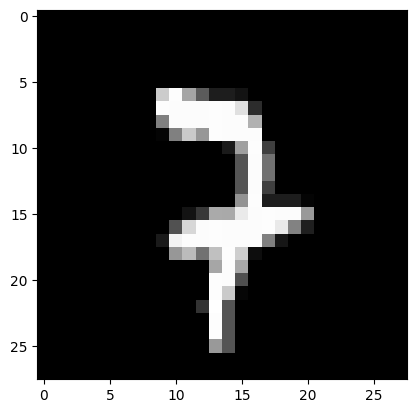

In [6]:
plt.imshow(np.squeeze(test_dataset[114][0]),cmap='gray')
plt.show()

In [7]:
print(model(test_dataset[114][0].cuda()).argmax())
model(test_dataset[114][0].cuda())

tensor(7, device='cuda:0')


tensor([[-4.9133e+00,  1.0719e+00,  5.5438e+00,  4.4558e+00, -3.7539e+00,
         -6.4878e+00, -9.7312e+00,  9.7786e+00,  6.9420e-04,  3.3875e+00]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [10]:
train_dataset = datasets.MNIST(root='/mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset =  datasets.MNIST(root='/mnist_data/',
                               train=False,
                               transform=transforms.ToTensor())
train_data = data.DataLoader(train_dataset,batch_size=64,shuffle=True)
test_data = data.DataLoader(test_dataset,batch_size=64,shuffle=True)

class Madel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.l1 = nn.Linear(784,550)
    self.l2 = nn.Linear(550,320)
    self.l3 = nn.Linear(320,120)
    self.l4 = nn.Linear(120,10)
    self.relu = nn.ReLU()

  def forward(self,x):
    x = x.view(-1,784)
    x1 = self.relu(self.l1(x))
    x2 = self.relu(self.l2(x1))
    x3 = self.relu(self.l3(x2))
    return self.l4(x3)

model = Madel()
model.to(device)

creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

def train(epoch):
  model.train()
  for b_i,data1 in enumerate(train_data):
    data1,label = data1[0].to(device),data1[1].to(device)
    optimizer.zero_grad()
    bash = model.forward(data1)
    loss = creterian(bash,label)
    loss.backward()
    optimizer.step()

    if b_i%100 == 0:
      print(f"Epoch = {epoch} | Batch = {b_i} | {b_i*len(data1)}/{len(train_data.dataset)} | Loss = {loss.item()} | ")

def test():
  model.eval()
  Xato = 0 ; Togri = 0
  for rasm, label in test_data:
    rasm,label = rasm.to(device),label.to(device)
    bashorat = model(rasm)
    Xato += creterian(bashorat,label).item()
    natija = bashorat.data.max(1)[1]
    Togri +=natija.eq(label.data.view_as(natija)).cuda().sum()
  print(f"Aniqlik = {Togri/len(test_data.dataset)} | Foizda {100.0*Togri/len(test_data.dataset)}%")
for epoch in range(11):
  train(epoch)
  test()


Epoch = 0 | Batch = 0 | 0/60000 | Loss = 2.306586265563965 | 
Epoch = 0 | Batch = 100 | 6400/60000 | Loss = 0.23415274918079376 | 
Epoch = 0 | Batch = 200 | 12800/60000 | Loss = 0.25763991475105286 | 
Epoch = 0 | Batch = 300 | 19200/60000 | Loss = 0.2358822375535965 | 
Epoch = 0 | Batch = 400 | 25600/60000 | Loss = 0.14528538286685944 | 
Epoch = 0 | Batch = 500 | 32000/60000 | Loss = 0.14310328662395477 | 
Epoch = 0 | Batch = 600 | 38400/60000 | Loss = 0.13192948698997498 | 
Epoch = 0 | Batch = 700 | 44800/60000 | Loss = 0.2080271691083908 | 
Epoch = 0 | Batch = 800 | 51200/60000 | Loss = 0.17289310693740845 | 
Epoch = 0 | Batch = 900 | 57600/60000 | Loss = 0.1562243402004242 | 
Aniqlik = 0.9662999510765076 | Foizda 96.62999725341797%
Epoch = 1 | Batch = 0 | 0/60000 | Loss = 0.055393874645233154 | 
Epoch = 1 | Batch = 100 | 6400/60000 | Loss = 0.023335358127951622 | 
Epoch = 1 | Batch = 200 | 12800/60000 | Loss = 0.09571313858032227 | 
Epoch = 1 | Batch = 300 | 19200/60000 | Loss = 0.0